##Hierarkisk klyngedannelse av bedrifter
Jesper Frausig

Inspirert av  Ari Silburt

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 16.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=e02a7818f30a40c386adb24221becda2c13152703816df3a24979210b3fb82a6
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas as pd
#url="https://raw.githubusercontent.com/jfrausig/test/master/ticker_3.csv"
#df=pd.read_csv(url, error_bad_lines=False)
df=pd.read_csv("http://pvexpect.com/IND310_2021_ESG/portfolio_3.csv", delimiter=";")

aktier=[]
for index, row in df.iterrows():
    d=row.to_dict()
    aktier.append(d)
    #print(d)
aktier=pd.DataFrame(aktier)

aktier

,Sector,industry,shortName222,country,website,ticker,longBusinessSummary,Virksomhed,Sak,Unnamed: 9,Unnamed: 10
0,Consumer Cyclical,Home Improvement Retail,Fiskars Corporation,Finland,http://www.fiskarsgroup.com,FSKRS.HE,Fiskars Oyj Abp manufactures and markets consu...,Fiskars Oyj Abp,Bærekraft,NaN,NaN
1,Consumer Cyclical,Residential Construction,Bonava AB ser. B,Sweden,http://www.bonava.com,BONAV-B.ST,Bonava AB (publ) develops and sells residentia...,Bonava AB (publ),Bærekraft,NaN,NaN
2,Consumer Cyclical,Restaurants,MARLEYSPN CDI1000:1,Germany,http://www.marleyspoon.de,MMM.AX,Marley Spoon AG provides subscription-based we...,Marley Spoon AG,Mat industri,NaN,https://ir.marleyspoon.com/investor-centre/?pa...
3,Consumer Defensive,Beverages—Brewers,Carlsberg B A/S,Denmark,http://www.carlsberggroup.com,CARL-B.CO,Carlsberg A/S engages in the production and sa...,Carlsberg A/S,Mat industri,NaN,https://www.carlsberggroup.com/investor-relati...
4,Consumer Defensive,Beverages—Brewers,Royal UNIBREW A/S,Denmark,http://www.royalunibrew.com,RBREW.CO,"Royal Unibrew A/S produces, markets, sells, an...",Royal Unibrew A/S,Mat industri,NaN,https://investor.royalunibrew.com/
...,...,...,...,...,...,...,...,...,...,...,...
127,Utilities,Utilities—Independent Power Producers,VERBIO VER.BIOENERGIE ON,Germany,http://www.verbio.de,VBK.DE,VERBIO Vereinigte BioEnergie AG produces and s...,VERBIO Vereinigte BioEnergie AG,Bærekraft,NaN,NaN
128,Utilities,Utilities—Renewable,ENCAVIS AG INH. O.N.,Germany,http://www.encavis.com,ECV.DE,"Encavis AG, an independent power producer, acq...",Encavis AG,Bærekraft,NaN,NaN
129,Utilities,Utilities—Renewable,ENERGIEKONTOR O.N.,Germany,http://www.energiekontor.de,EKT.DE,"Energiekontor AG, a project developer, engages...",Energiekontor AG,Bærekraft,NaN,NaN
130,Utilities,Utilities—Renewable,Fortum Corporation,Finland,http://www.fortum.com,FORTUM.HE,"Fortum Oyj, together with its subsidiaries, en...",Fortum Oyj,Bærekraft,NaN,NaN


In [3]:
aktier = aktier.assign(**{'aktie': ""})

aktier.index=aktier.ticker
for i, ticker in enumerate(aktier[aktier['Virksomhed']. notna()].ticker):

  name=aktier['Virksomhed'][ticker]
  aktier['Virksomhed'][ticker]=str(name).replace(".","").replace("-","").replace("(","").replace(")","").replace("/","")

aktier #[aktier['shortName']. notna()]

,Sector,industry,shortName222,country,website,ticker,longBusinessSummary,Virksomhed,Sak,Unnamed: 9,Unnamed: 10,aktie
ticker,,,,,,,,,,,,
FSKRS.HE,Consumer Cyclical,Home Improvement Retail,Fiskars Corporation,Finland,http://www.fiskarsgroup.com,FSKRS.HE,Fiskars Oyj Abp manufactures and markets consu...,Fiskars Oyj Abp,Bærekraft,NaN,NaN,
BONAV-B.ST,Consumer Cyclical,Residential Construction,Bonava AB ser. B,Sweden,http://www.bonava.com,BONAV-B.ST,Bonava AB (publ) develops and sells residentia...,Bonava AB publ,Bærekraft,NaN,NaN,
MMM.AX,Consumer Cyclical,Restaurants,MARLEYSPN CDI1000:1,Germany,http://www.marleyspoon.de,MMM.AX,Marley Spoon AG provides subscription-based we...,Marley Spoon AG,Mat industri,NaN,https://ir.marleyspoon.com/investor-centre/?pa...,
CARL-B.CO,Consumer Defensive,Beverages—Brewers,Carlsberg B A/S,Denmark,http://www.carlsberggroup.com,CARL-B.CO,Carlsberg A/S engages in the production and sa...,Carlsberg AS,Mat industri,NaN,https://www.carlsberggroup.com/investor-relati...,
RBREW.CO,Consumer Defensive,Beverages—Brewers,Royal UNIBREW A/S,Denmark,http://www.royalunibrew.com,RBREW.CO,"Royal Unibrew A/S produces, markets, sells, an...",Royal Unibrew AS,Mat industri,NaN,https://investor.royalunibrew.com/,
...,...,...,...,...,...,...,...,...,...,...,...,...
VBK.DE,Utilities,Utilities—Independent Power Producers,VERBIO VER.BIOENERGIE ON,Germany,http://www.verbio.de,VBK.DE,VERBIO Vereinigte BioEnergie AG produces and s...,VERBIO Vereinigte BioEnergie AG,Bærekraft,NaN,NaN,
ECV.DE,Utilities,Utilities—Renewable,ENCAVIS AG INH. O.N.,Germany,http://www.encavis.com,ECV.DE,"Encavis AG, an independent power producer, acq...",Encavis AG,Bærekraft,NaN,NaN,
EKT.DE,Utilities,Utilities—Renewable,ENERGIEKONTOR O.N.,Germany,http://www.energiekontor.de,EKT.DE,"Energiekontor AG, a project developer, engages...",Energiekontor AG,Bærekraft,NaN,NaN,


In [4]:
#@title Hent aktier
import yfinance as yf

def stockDownload(symbol):

  stock = yf.Ticker(symbol)

  hist = stock.history(period="5y")

  return hist


In [5]:
import bs4 as bs
import pickle
import requests
import os
import pandas as pd

def save_sp500_tickers():

    tickers = []
    for aktie in aktier:
        ticker = aktie
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=False):
    
    if reload_sp500:
        
        tickers = save_sp500_tickers()
    else:
        
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')



    #for i, n, in enumerate(aktier):
    for i in range(0,len(aktier)):
        #print(n)
        
        #print()
        aktie=aktier['Virksomhed'][i]
        ticker=aktier['ticker'][i]
        stock_name=str(aktier['ticker'][i])
        # just in case your connection breaks, we'd like to save our progress!
        if not os.path.exists('stock_dfs/{}.csv'.format(aktie)):
            
            df=stockDownload(stock_name)
 
            df.to_csv('stock_dfs/{}.csv'.format(aktie))
            print('Downloading {}'.format(aktie))
        else:
            print('Already have {}'.format(aktie))


get_data_from_yahoo()

- CLNK-B.ST: No data found, symbol may be delisted
- OSR.DE: No data found, symbol may be delisted


In [6]:
import pandas as pd
def compile_data():
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)
        print(tickers)
    main_df = pd.DataFrame()

    #for count, ticker in enumerate(tickers):

    for i in range(0,len(aktier)):
        #print(n)
        
        #print()
        aktie=aktier['Virksomhed'][i]
        ticker=aktier['ticker'][i]
        print(aktie)
        #stock_name=str(aktier['Ticker'][i])

        ds=pd.DataFrame()
        print(ticker)
        df = pd.read_csv('stock_dfs/{}.csv'.format(aktie))
        df.set_index('Date', inplace=True)

        df.dropna(inplace=True)
        #df.index=df.Date
        #print(df.info())
        try:
          ds['Close']=df['Adj Close']
        except:
          #ds[ticker]=df['Close']
          print("ok")
        
        ds[aktie]=df['Close']
        ds.rename(columns={'Close': aktie}, inplace=True)
        print(ds)
        """
        try:
          df.drop(['Open', 'High', 'Low','Dividends','Stock Splits', 'Volume'], 1, inplace=True)
        
        except:
          df.drop(['Open', 'High', 'Low', 'Volume'], 1, inplace=True)
        """

        if main_df.empty:
            main_df = ds
        else:
            main_df = main_df.join(ds, how='outer')

        if i % 10 == 0:
            print(i)
    print(main_df.head())
    main_df.to_csv('sp500_joined_closes.csv')


compile_data()

['Sector', 'industry', 'shortName222', 'country', 'website', 'ticker', 'longBusinessSummary', 'Virksomhed', 'Sak', 'Unnamed: 9', 'Unnamed: 10', 'aktie']
Fiskars Oyj Abp
FSKRS.HE
ok
            Fiskars Oyj Abp
Date                       
2016-10-21         9.720643
2016-10-24         9.709014
2016-10-25         9.586927
2016-10-26         9.598554
2016-10-27         9.517160
...                     ...
2021-10-15        21.200001
2021-10-18        21.450001
2021-10-19        21.100000
2021-10-20        21.150000
2021-10-21        20.900000

[1256 rows x 1 columns]
0
Bonava AB publ
BONAV-B.ST
ok
            Bonava AB publ
Date                      
2016-10-21       87.941833
2016-10-24       88.350479
2016-10-25       88.595657
2016-10-26       88.105286
2016-10-27       88.840858
...                    ...
2021-10-15       84.349998
2021-10-18       85.449997
2021-10-19       86.500000
2021-10-20       86.500000
2021-10-21       86.599998

[1257 rows x 1 columns]
Marley Spoon AG
MMM.AX


In [7]:
#https://towardsdatascience.com/altair-plot-deconstruction-visualizing-the-correlation-structure-of-weather-data-38fb5668c5b1
import altair as alt
#def visualize_data():
df = pd.read_csv('sp500_joined_closes.csv')
#df_corr = df[['Cummins','PACCAR']].corr()
df_corr = df.corr()

df_corr.to_csv('sp500corr.csv')

alt.data_transformers.disable_max_rows()


cor_data = df_corr.stack().reset_index().rename(columns={0: 'correlation', 'level_0': 'Virksomhed', 'level_1': 'aktie_2'}).sort_values(by="correlation",kind="quicksort")       # The stacking results in an index on the correlation values, we need the index as normal columns for Altair
#print(list(cor_data.variable))             
cor_data['Aktier'] = cor_data['correlation'].map('{:.2f}'.format)  # Round to 2 decimal


aktie_navne=aktier #"https://raw.githubusercontent.com/jfrausig/test/master/ticker_3.csv"

Sector=alt.binding_select(options=list(aktier.Sector.unique()))
Aktie_selector = alt.selection_single(fields=['Sector'],name='Sector', bind=Sector, #, clear=False,  #, 'variable2']
                                  init={'Sector': 'Byggeri'}) 

base =alt.Chart(cor_data).mark_bar().transform_lookup(
    lookup='aktie_2',
    from_=alt.LookupData(aktie_navne, 'Virksomhed', ['Sector']) 
).transform_filter(
  #Aktie_selector
  'datum.Sector==Sector.Sector' #||datum.sektor==sektor.sektor&&datum.aktie_2==datum.aktie_2', #&&datum.variable2==datum.aktie
).encode(

x=alt.X('aktie_2:O', axis=alt.Axis(orient='top',labelAngle=80,labelFontSize=8),sort=list('datum.Virksomhed')), #<,sort=list('datum.aktie')#,axis=alt.Axis(labelAngle=0) sort=list(cor_data.variable2),
y=alt.Y('Virksomhed:O',axis=alt.Axis(labelFontSize=8),sort=list('datum.Virksomhed')), #, sort=list(cor_data.aktie)
  
).properties(width=600,height=200)


var_sel_cor = alt.selection_single( fields=['Virksomhed'], clear=False,  #, 'variable2']
                                  init={'Virksomhed': 'Mowi'}) #, 'variable2': 'SalMar'


cor_plot = base.mark_rect().add_selection(var_sel_cor).transform_lookup(
    lookup='Virksomhed',
    from_=alt.LookupData(aktie_navne, 'Virksomhed', ['Sector']) 
).encode(
    color='correlation:Q',
    #color=alt.condition(var_sel_cor, alt.value('pink'), 'correlation:Q')
    opacity = alt.condition(var_sel_cor, alt.value(1), alt.value(0.4)),
)

text_labels = base.mark_text(color='Aktier:N', size=8).encode(
    text='Aktier:N',
    color=alt.condition(
        alt.datum.correlation > 0.5, 
        alt.value('white'),
        alt.value('black'),
    #opacity = alt.condition(single_click, alt.value(1), alt.value(0.05)),
    
    )
    
)

alt.vconcat((cor_plot + text_labels).add_selection(Aktie_selector).transform_lookup(
    lookup='Virksomhed',
    from_=alt.LookupData(aktie_navne, 'Virksomhed', ['Sector']) 
).transform_filter(
  #Aktie_selector
  'datum.Sector==Sector.Sector' #||datum.sektor==sektor.sektor&&datum.aktie_2==datum.aktie_2', #&&datum.variable2==datum.aktie
))

alt.VConcatChart(...)

In [ ]:
#!pip install investpy
!pip install git+https://github.com/alvarobartt/investpy.git@master
#@title Installere bibliotekker
!pip install yfinance
#@title Installere bibliotekker
!pip install yfinance
!pip install pandas-datareader
!pip install yahoofinancials
!pip install dbnomics
!pip install dask[dataframe]
!pip install d6tstack

In [9]:
#@title Hent aktier
import yfinance as yf

def stockDownload(symbol):

  stock = yf.Ticker(symbol)

  hist = stock.history(period="5y")

  return hist


In [11]:
#Load relevant packages
import datetime
from pandas_datareader import data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

### Distance Measure for clustering
In order to cluster the stocks we need an inherest distance measurement. The most popular one which we will use is the standard correlation coefficient:

<h3 align="center"> $\rho(x,y) = \frac{cov(x,y)}{\sigma_x \sigma_y} $ </h3>

Other distance measures can be used, like Maximal Information Compression Index, Least Square Regression Error, etc.

In the correlation matrix plotted below, red/blue colours indicate high/low correlation. You will notice a perfect 1:1 correlation along the diagonal as expected (all stocks have a perfect correlation with themselves).

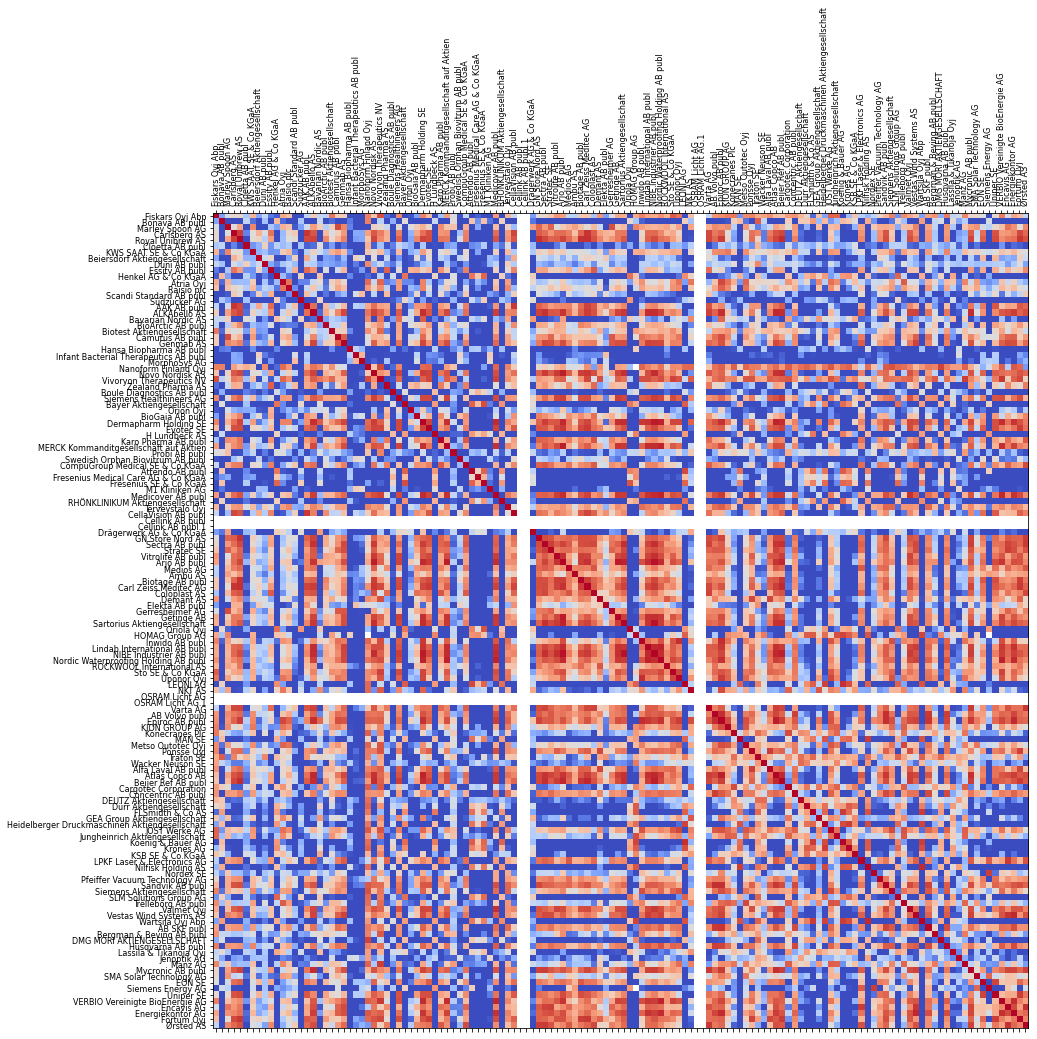

In [12]:
#find correlation matrix, i.e. the "distances" between each stock
corr = df.drop(['Date'], axis = 1).corr()
size = 15
fig, ax = plt.subplots(figsize=(size, size))
ax.matshow(corr,cmap=cm.get_cmap('coolwarm'), vmin=0,vmax=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical', fontsize=8);
plt.yticks(range(len(corr.columns)), corr.columns, fontsize=8);

### Clusters of Correlation - Agglomerate
The next step is to look for clusters of correlations using the agglomerate hierarchical clustering technique. Its primary advantage over other clustering methods is that you don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the average distance measurement, but others are possible (ward, single, centroid, etc.). 

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(corr.fillna(0), 'average')
Z[0]

array([50., 51.,  0.,  2.])

### Cophenetic Correlation coefficient
It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient, $c$. This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer $c$ is to 1, the better the clustering preserves the original distances. Generally  $c$ > 0.7 is consistered a good cluster fit. Of course, other accuracy checks are possible.

In [14]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(corr))
c

nan

### Dendogram
The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

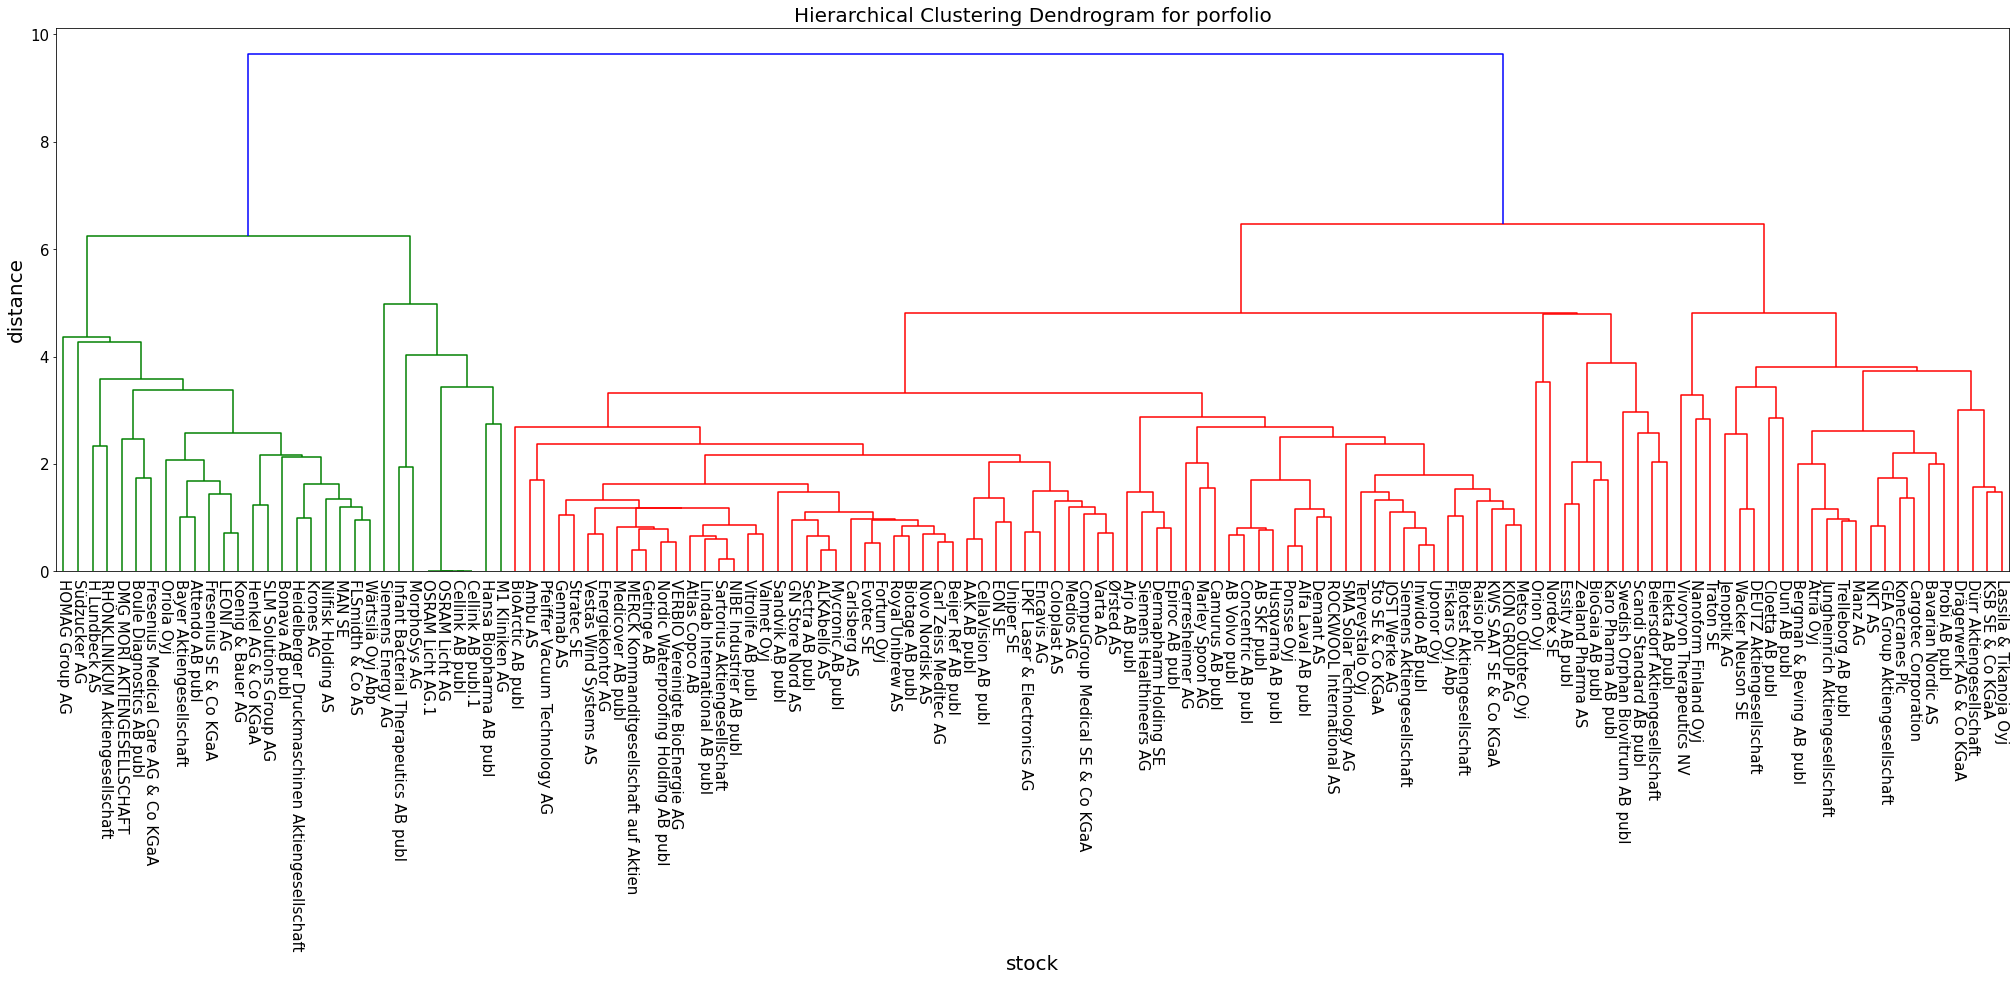

In [15]:
plt.figure(figsize=(35, 10))
labelsize=20
ticksize=15
index="porfolio"
plt.title('Hierarchical Clustering Dendrogram for '+index, fontsize=labelsize)
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=10.,  # font size for the x axis labels
    labels = corr.columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.savefig('dendogram_'+index+'.png')
plt.show()


https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/  
http://www.alastairsanderson.com/projects/Dow-Jones-Industrial-Average-stock-clustering-analysis/
http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.cophenet.html